In [2]:
import random
import pandas as pd

spam_list = []
not_spam_list = []


def create_line(name_list, count, contact_type, email_type):
    for i in range(count):
        name_list.append([contact_type, email_type])
    return name_list


def list_shuf(list_name, number):
    for i in range(number):
        random.shuffle(list_name)


spam_list = create_line(spam_list, 15, "Colleague", True)
spam_list = create_line(spam_list, 59, "Contacted", True)
spam_list = create_line(spam_list, 926, "Neither", True)

list_shuf(spam_list, 3)


not_spam_list = create_line(not_spam_list, 1029, "Colleague", False)
not_spam_list = create_line(not_spam_list, 1418, "Contacted", False)
not_spam_list = create_line(not_spam_list, 1553, "Neither", False)

list_shuf(not_spam_list, 3)


last_list = spam_list + not_spam_list
list_shuf(last_list, 3)

df = pd.DataFrame(last_list)
df.columns = ['contact_type', 'spam']
df.to_csv('dataSetEmail.csv', index=False)



Train set: (4000, 1) (4000, 1)
Test set: (1000, 1) (1000, 1)
Jacard Score is 0.799
[[  0 201]
 [  0 799]]
Confusion matrix, without normalization
[[  0 201]
 [  0 799]]
log loss:  0.3812814514423869


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


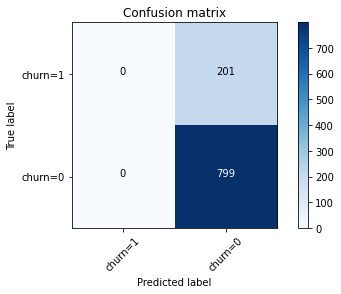

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import log_loss

df = pd.read_csv("dataSetEmail.csv")

X = np.asarray(df[["contact_type"]])
# print(X[0:5])

y = np.asarray(df[["spam"]])
# print(y[0:5])

le_contact = preprocessing.LabelEncoder()
le_contact.fit(["Colleague", "Contacted", "Neither"])
X[:, 0] = le_contact.transform(X[:, 0])
# print(X[0:5])

le_spam = preprocessing.LabelEncoder()
le_spam.fit([True, False])
y[:, 0] = le_spam.transform(y[:, 0])
# print(y[0:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

LR = LogisticRegression(C=0.08, solver="saga").fit(X_train, y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print("Jacard Score is", jaccard_score(y_test, yhat, pos_label=0))


def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


print(confusion_matrix(y_test, yhat, labels=[1, 0]))
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cnf_matrix,
    classes=["churn=1", "churn=0"],
    normalize=False,
    title="Confusion matrix",
)

print("log loss: ",log_loss(y_test, yhat_prob))